In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/TinderClusster/Seoul_Geocode.csv', index_col=False, engine='python')
df.drop(['Index','Addr'],axis = 1, inplace = True)
df.dropna(inplace = True)
xmax = np.max(df['Lon'])
xmin = np.min(df['Lon'])
ymax = np.max(df['Lat'])
ymin = np.min(df['Lat'])

print('x min = {} x max = {} \ny min = {} y max = {}'.format(xmin,xmax,ymin,ymax))

x min = 126.7682219 x max = 127.1826709 
y min = 37.43040649 y max = 37.69440723


In [ ]:
def df_standardize_column(df,name):
  df[name] = (df[name] - df[name].min())/(df[name].max() - df[name].min())
  return df

df = df_standardize_column(df,'Lon')
df = df_standardize_column(df,'Lat')

In [ ]:
df

,Lon,Lat
0,0.479436,0.612187
1,0.476860,0.606033
2,0.475592,0.602588
3,0.483407,0.598280
4,0.482522,0.593302
...,...,...
135405,0.995281,0.491151
135406,0.990649,0.491141
135407,0.985485,0.492120
135408,0.986263,0.496344


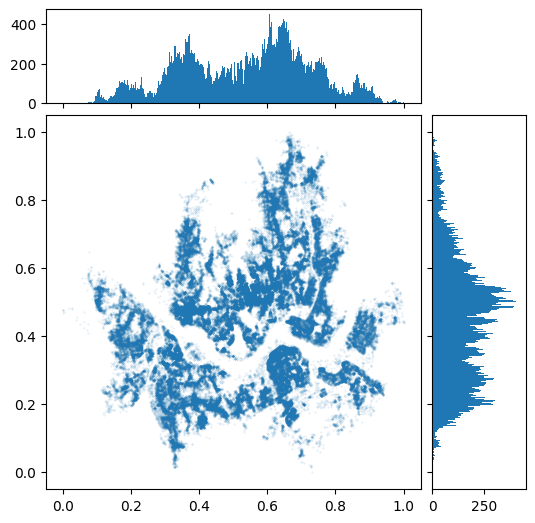

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    xmax = 1
    xmin = 0
    ymax = 1
    ymin = 0
    ax.scatter(x, y, s=0.1,alpha=0.2)
    # now determine nice limits by hand:
    binwidth = 0.001
    binsx = np.arange(xmin, xmax + binwidth, binwidth)
    binsy = np.arange(ymin, ymax + binwidth, binwidth)
    ax_histx.hist(x, bins=binsx)
    ax_histy.hist(y, bins=binsy, orientation='horizontal')



fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

scatter_hist(df['Lon'],df['Lat'],ax, ax_histx, ax_histy)

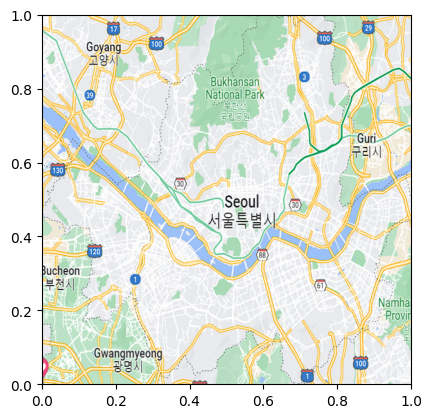

In [ ]:
  img = Image.open('/content/drive/MyDrive/TinderClusster/seoul.png')
  img2 = img.resize((576,576))
  plt.imshow(img2, extent=[0,1,0,1])

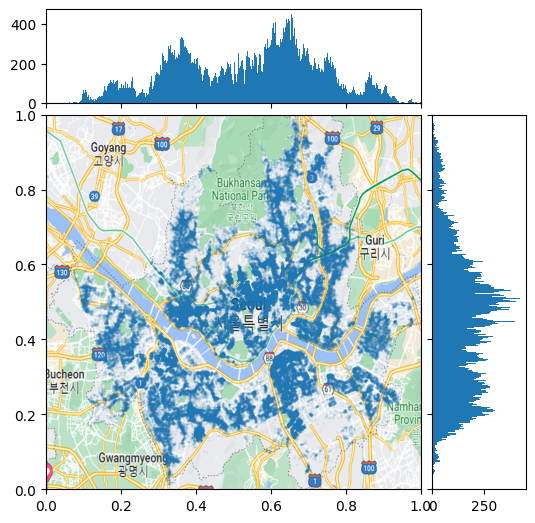

In [ ]:
def scatter_hist_with_pic(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    xmax = 1
    xmin = 0
    ymax = 1
    ymin = 0
    img = Image.open('/content/drive/MyDrive/TinderClusster/seoul.png')
    img2 = img.resize((576,576))
    ax.imshow(img2, extent=[xmin,xmax,ymin,ymax])
    ax.scatter(x, y, s=0.1,alpha=0.2)
    # now determine nice limits by hand:
    binwidth = 0.001
    binsx = np.arange(xmin, xmax + binwidth, binwidth)
    binsy = np.arange(ymin, ymax + binwidth, binwidth)
    ax_histx.hist(x, bins=binsx)
    ax_histy.hist(y, bins=binsy, orientation='horizontal')



fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

scatter_hist_with_pic(df['Lon'],df['Lat'],ax, ax_histx, ax_histy)

Wpływ wielkości zbioru na czas wykonywania algorytmu:

130k : Niewykonalne

13k  : 6 min

1,3k : 2 s

In [ ]:
from sklearn.model_selection import train_test_split
X, y = train_test_split(df, train_size = 0.01, random_state = 42)
X

,Lon,Lat
51047,0.606436,0.797408
62768,0.374215,0.691117
9078,0.607299,0.559744
68577,0.367769,0.447418
127118,0.823273,0.320962
...,...,...
110268,0.518027,0.196376
119879,0.707217,0.199990
103694,0.396081,0.296535
131932,0.839795,0.209145


Możliwe zmienne:

damping = [0.5, 1]



In [ ]:
from sklearn.cluster import AffinityPropagation

afprop = AffinityPropagation(damping=0.8, max_iter = 100, random_state = 46 )
afprop.fit(X)
cci = afprop.cluster_centers_indices_
cc = afprop.cluster_centers_
n_clusters =len(cci)
n_clusters

28

In [ ]:
cc = pd.DataFrame(cc)
cc[0]

0     0.767793
1     0.759521
2     0.740514
3     0.720576
4     0.208958
5     0.469787
6     0.713355
7     0.607100
8     0.638562
9     0.401999
10    0.605206
11    0.618328
12    0.370304
13    0.881479
14    0.509404
15    0.533568
16    0.635605
17    0.615596
18    0.312353
19    0.715955
20    0.212846
21    0.375546
22    0.868898
23    0.399056
24    0.373624
25    0.326259
26    0.330573
27    0.103816
Name: 0, dtype: float64

In [ ]:
df_with_pred = df.copy()
df_with_pred['pred'] = afprop.predict(df)

number of districts: 28


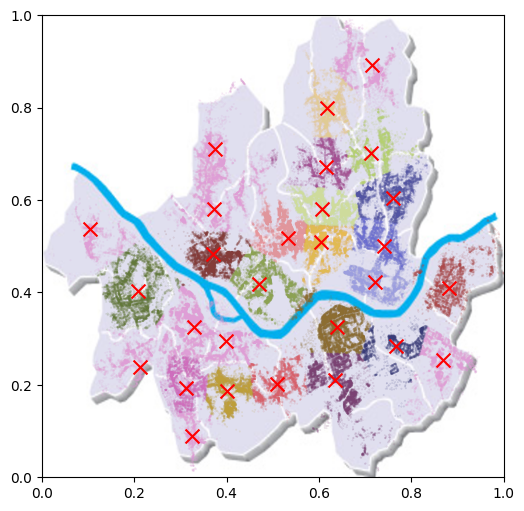

In [ ]:
def scatter_with_pred_and_pic(x, y, pred, pred_unique):

    # the scatter plot:
    fig = plt.figure(figsize=(6, 6))
    img = Image.open('/content/drive/MyDrive/TinderClusster/seoul_dist.jpg')
    img2 = img.resize((576,576))
    plt.imshow(img2, extent=[0,1,0,1])
    colors = plt.cm.tab20b(range(len(pred_unique)))
    color_dict = {num: color for num, color in enumerate(colors)}
    pred = [color_dict[x] for x in pred]
    plt.scatter(x, y, s=0.1 ,alpha=0.2, c = pred)
    plt.scatter(cc[0], cc[1],marker = 'x', color = 'red', s = 100)
    print("number of districts: {}".format(len(pred_unique)))

scatter_with_pred_and_pic(df['Lon'],df['Lat'], df_with_pred['pred'],df_with_pred['pred'].unique())

In [ ]:
def scatter_with_pred_and_pic(x, y, pred, pred_unique):

    # the scatter plot:
    fig = plt.figure(figsize=(6, 6))
    img = Image.open('/content/drive/MyDrive/TinderClusster/seoul_dist.jpg')
    img2 = img.resize((576,576))
    plt.imshow(img2, extent=[0,1,0,1])
    colors = plt.cm.tab20b(range(len(pred_unique)))
    color_dict = {num: color for num, color in enumerate(colors)}
    pred = [color_dict[x] for x in pred]
    plt.scatter(x, y, s=0.1,alpha=0.05, c = pred)
    print("number of districts: {}".format(len(pred_unique)))

scatter_with_pred_and_pic(df['Lon'],df['Lat'], df_with_pred['pred'],df_with_pred['pred'].unique())

<ipython-input-106-fdce9e87628b>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df_new['Lon'],df_new['Lat'],s=0.2,alpha=0.01, c = color_dict[i])


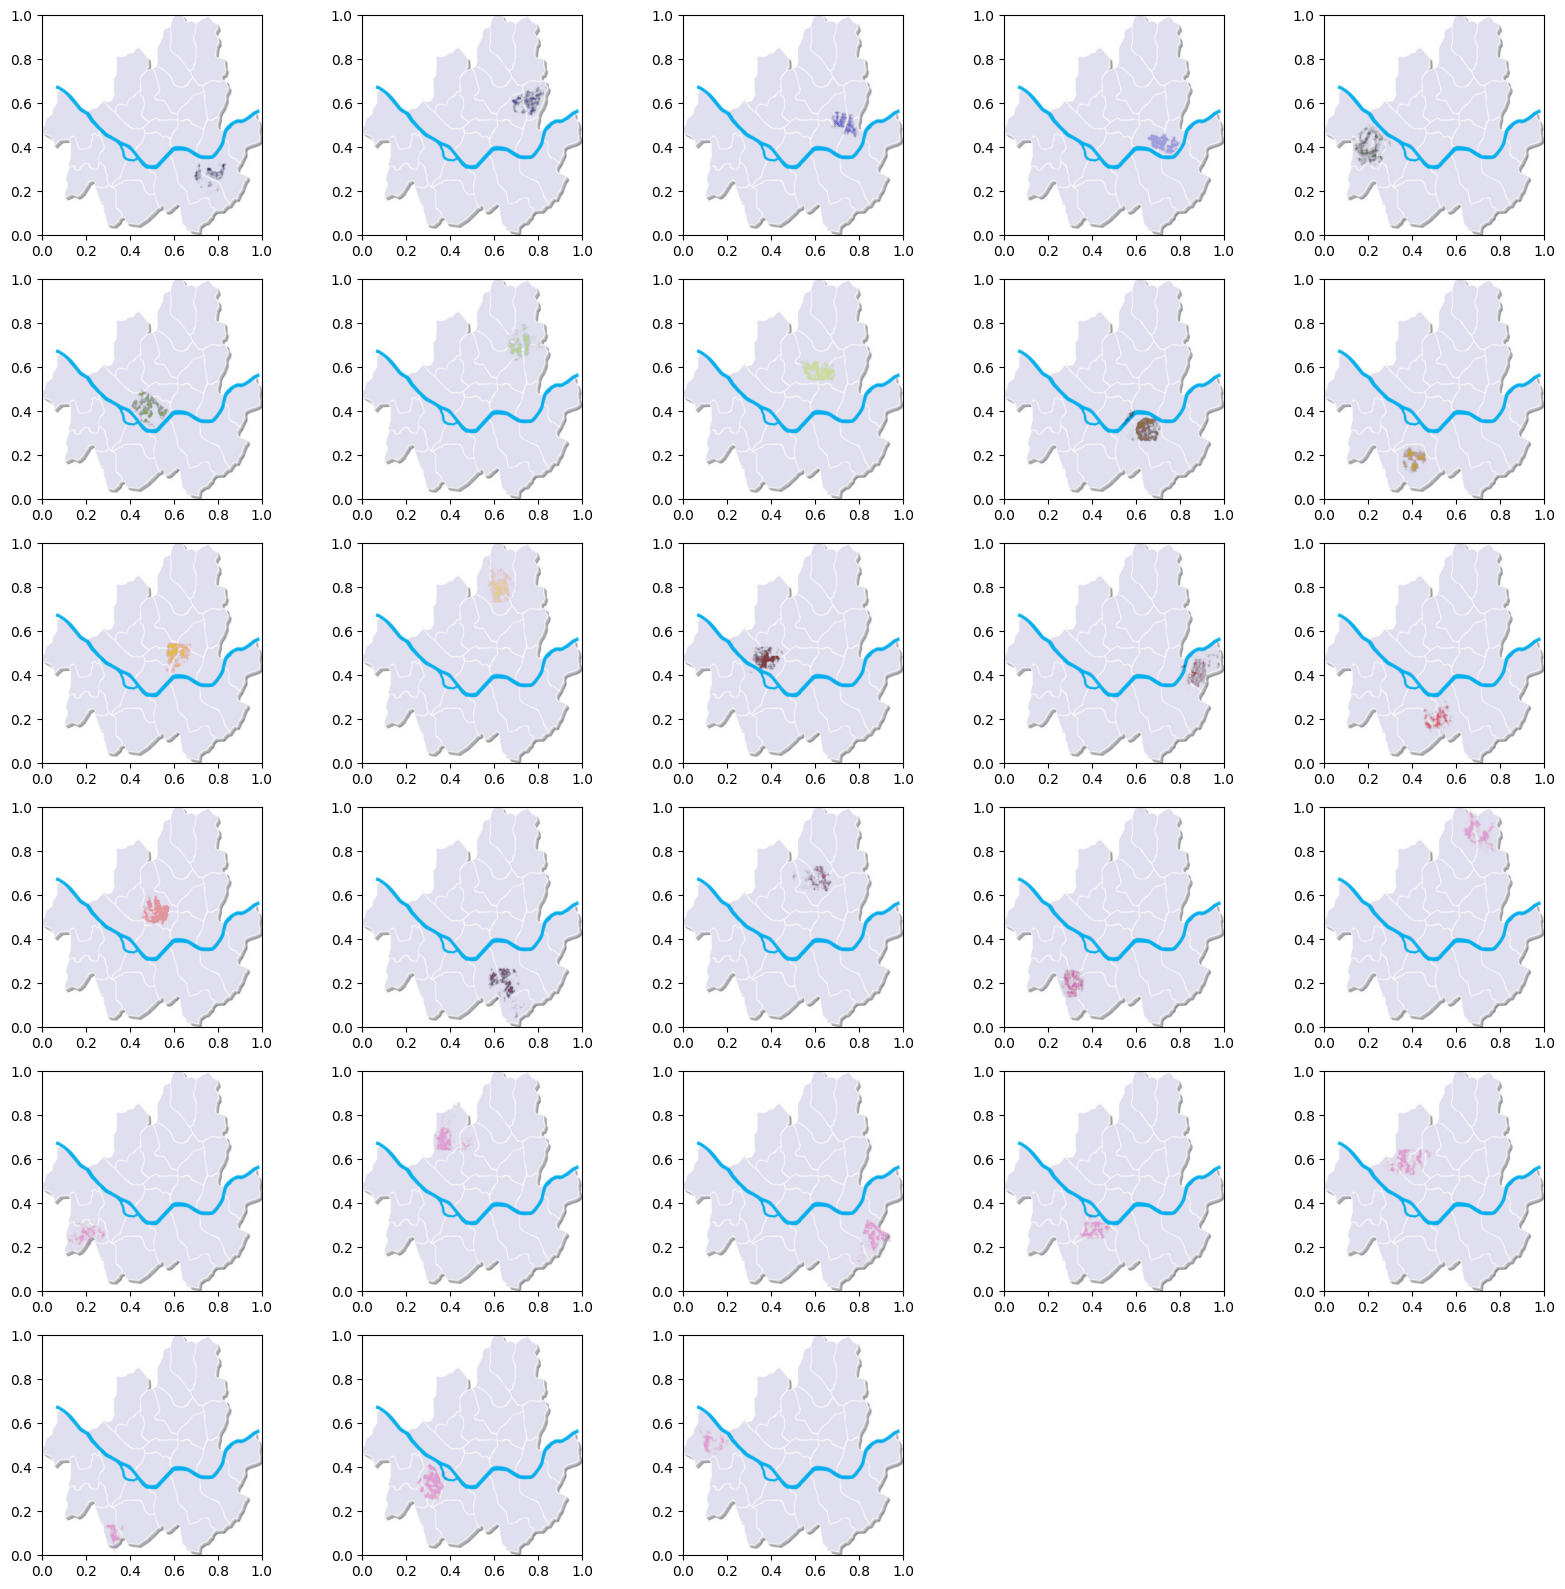

In [ ]:
import math

rows = math.ceil(n_clusters/5)
img = Image.open('/content/drive/MyDrive/TinderClusster/seoul_dist.jpg')
img2 = img.resize((576,576))
plt.figure(figsize=(20,20))
colors = plt.cm.tab20b(range(n_clusters))
color_dict = {num: color for num, color in enumerate(colors)}
for i in range(n_clusters):
  plt.subplot(rows,5,i+1)
  df_new = df[df_with_pred['pred'] == i]
  plt.imshow(img2, extent=[0,1,0,1])
  plt.scatter(df_new['Lon'],df_new['Lat'],s=0.2,alpha=0.01, c = color_dict[i])
  plt.xlim(0, 1)
  plt.ylim(0, 1)



In [ ]:
df_names = pd.read_csv('/content/drive/MyDrive/TinderClusster/Seoul_Geocode.csv', index_col=False, engine='python')
df_names.dropna(inplace = True)
df_names['Addr1'] = df_names['Addr'].str.extract(r'(\w*-gu)')
for element in df_names['Addr1'].unique():
  print(element)
dist_dict = {a:b for (b,a) in enumerate(df_names['Addr1'].unique())}

Jongno-gu
Jung-gu
Yongsan-gu
Seongdong-gu
Gwangjin-gu
Dongdaemun-gu
Jungnang-gu
Seongbuk-gu
Gangbuk-gu
Dobong-gu
Nowon-gu
Eunpyeong-gu
Seodaemun-gu
Mapo-gu
Yangcheon-gu
Gangseo-gu
Guro-gu
Geumcheon-gu
Yeongdeungpo-gu
Dongjak-gu
Gwanak-gu
Seocho-gu
Gangnam-gu
Songpa-gu
Gangdong-gu


In [ ]:
dist_dict

{'Jongno-gu': 0,
 'Jung-gu': 1,
 'Yongsan-gu': 2,
 'Seongdong-gu': 3,
 'Gwangjin-gu': 4,
 'Dongdaemun-gu': 5,
 'Jungnang-gu': 6,
 'Seongbuk-gu': 7,
 'Gangbuk-gu': 8,
 'Dobong-gu': 9,
 'Nowon-gu': 10,
 'Eunpyeong-gu': 11,
 'Seodaemun-gu': 12,
 'Mapo-gu': 13,
 'Yangcheon-gu': 14,
 'Gangseo-gu': 15,
 'Guro-gu': 16,
 'Geumcheon-gu': 17,
 'Yeongdeungpo-gu': 18,
 'Dongjak-gu': 19,
 'Gwanak-gu': 20,
 'Seocho-gu': 21,
 'Gangnam-gu': 22,
 'Songpa-gu': 23,
 'Gangdong-gu': 24}

In [ ]:
df_names

,Index,Lon,Lat,Addr,Addr1
0,1,126.966924,37.592024,3 100 Cheongun-dong Jongno-gu Seoul,Jongno-gu
1,2,126.965856,37.590400,4 20 Cheongun-dong Jongno-gu Seoul,Jongno-gu
2,3,126.965330,37.589490,7 1 Cheongun-dong Jongno-gu Seoul,Jongno-gu
3,4,126.968569,37.588353,30 15 Cheongun-dong Jongno-gu Seoul,Jongno-gu
4,5,126.968203,37.587039,52 11 Cheongun-dong Jongno-gu Seoul,Jongno-gu
...,...,...,...,...,...
135405,135406,127.180715,37.560071,695 Gangil-dong Gangdong-gu Seoul,Gangdong-gu
135406,135407,127.178795,37.560068,699 Gangil-dong Gangdong-gu Seoul,Gangdong-gu
135407,135408,127.176655,37.560326,700 Gangil-dong Gangdong-gu Seoul,Gangdong-gu
135408,135409,127.176978,37.561442,701 Gangil-dong Gangdong-gu Seoul,Gangdong-gu


number of districts: 25


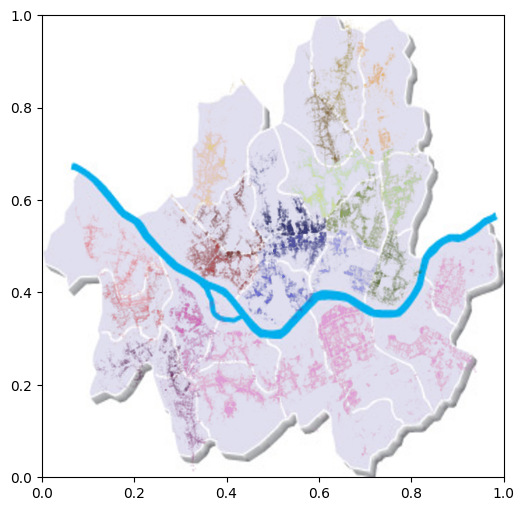

In [ ]:
def scatter_with_pred_and_pic(x, y, pred, pred_unique):

    # the scatter plot:
    fig = plt.figure(figsize=(6, 6))
    img = Image.open('/content/drive/MyDrive/TinderClusster/seoul_dist.jpg')
    img2 = img.resize((576,576))
    plt.imshow(img2, extent=[0,1,0,1])
    colors = plt.cm.tab20b(range(len(pred_unique)))
    color_dict = {num: color for num, color in enumerate(colors)}
    pred = [color_dict[x] for x in pred]
    plt.scatter(x, y, s=0.1,alpha=0.05, c = pred)
    print("number of districts: {}".format(len(pred_unique)))

df_names = df_standardize_column(df_names,'Lon')
df_names = df_standardize_column(df_names,'Lat')
district = [dist_dict[x] for x in df_names['Addr1']]
scatter_with_pred_and_pic(df_names['Lon'],df_names['Lat'], district,df_names['Addr1'].unique())

<ipython-input-154-ed3d7f8c3fdc>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df_new['Lon'],df_new['Lat'],s=0.2,alpha=0.01, c = color_dict[i])


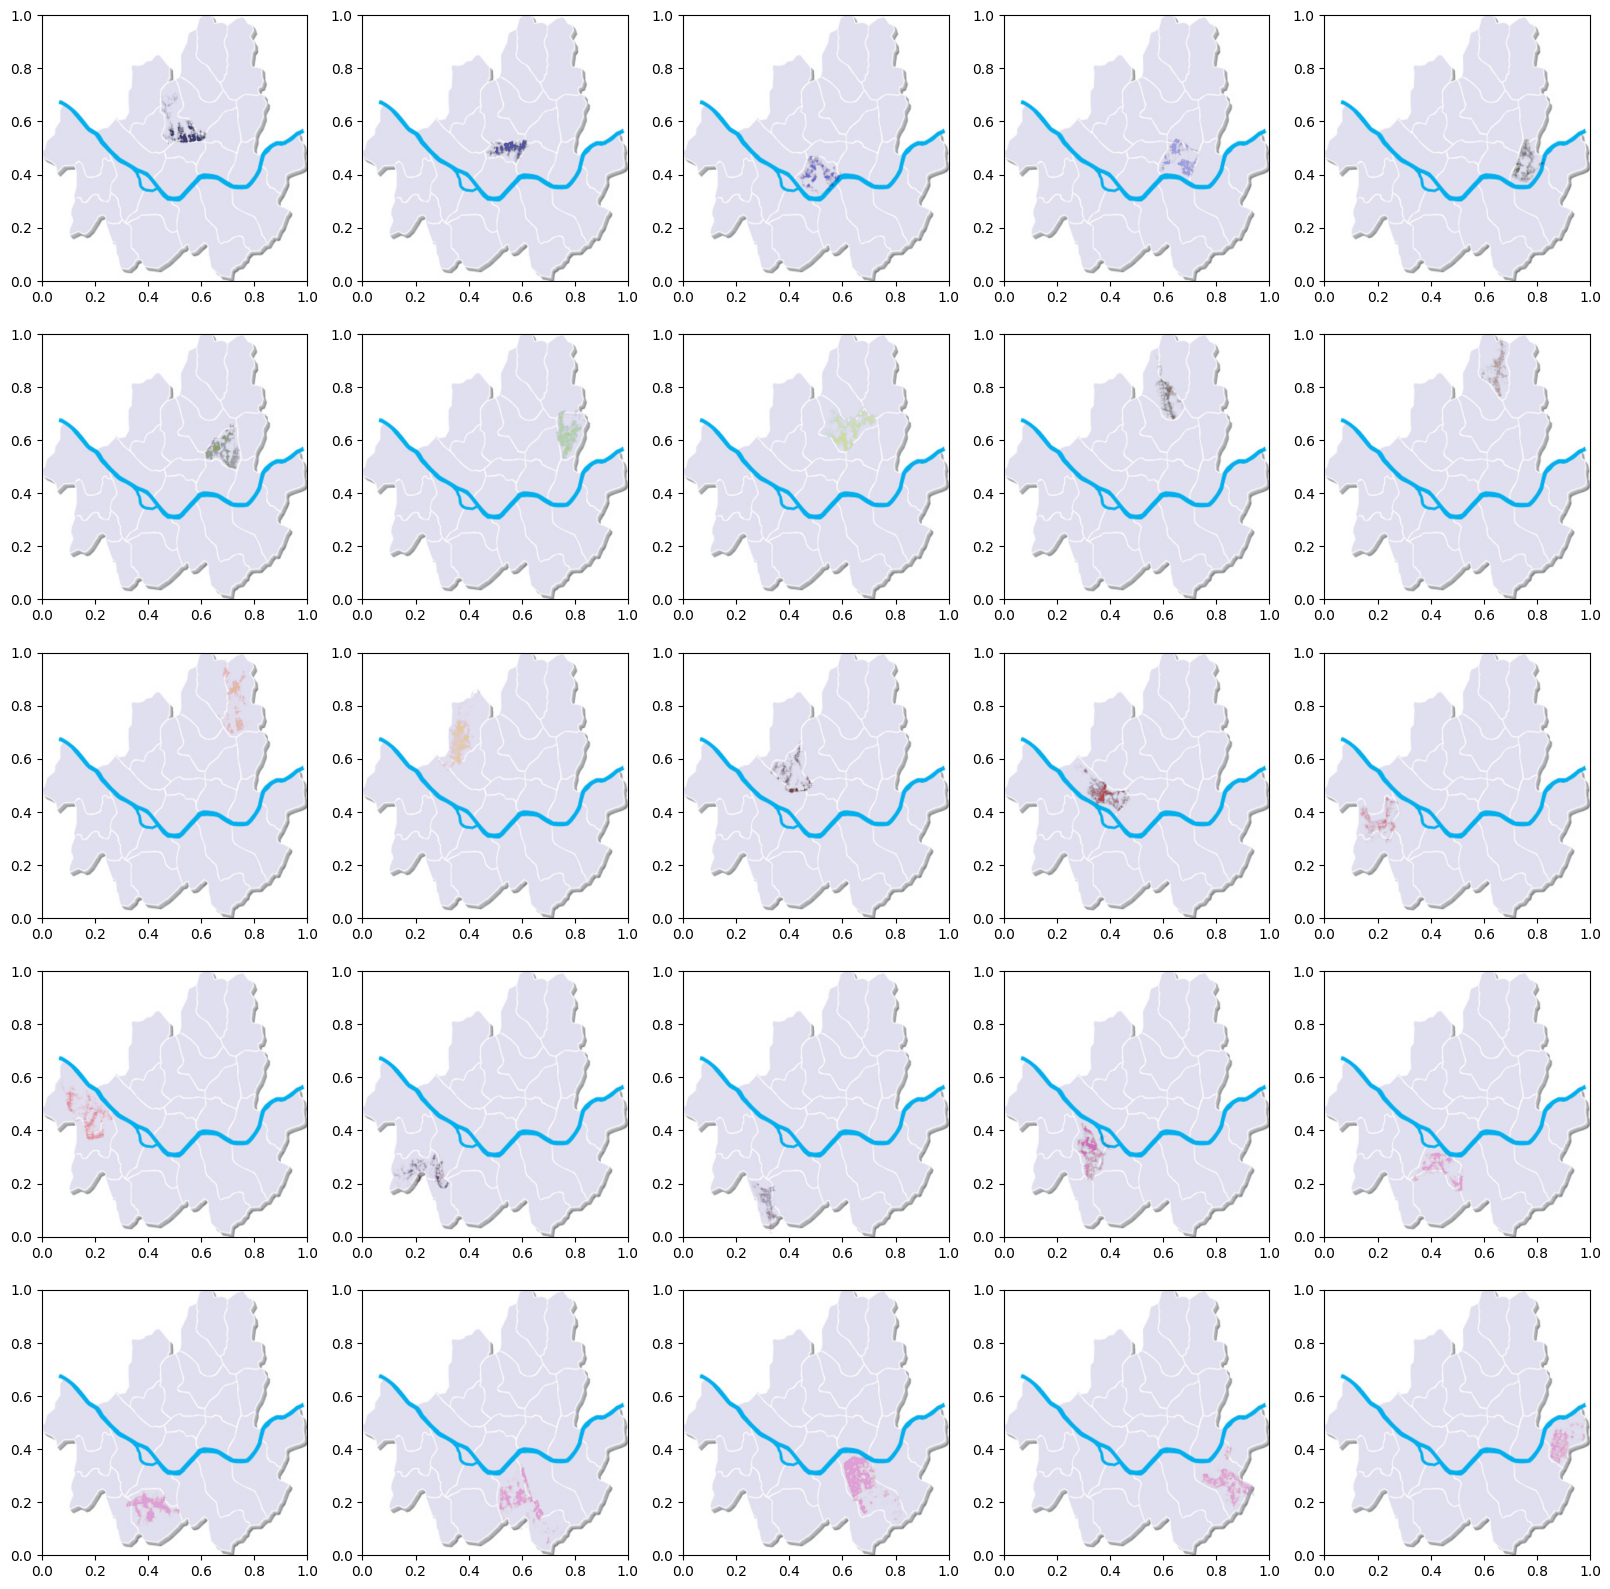

In [ ]:
img = Image.open('/content/drive/MyDrive/TinderClusster/seoul_dist.jpg')
img2 = img.resize((576,576))
plt.figure(figsize=(20,20))
colors = plt.cm.tab20b(range(25))
color_dict = {num: color for num, color in enumerate(colors)}
df_names['Addr2'] = district
for i in range(25):
  plt.subplot(5,5,i+1)
  df_new = df_names[df_names['Addr2'] == i]
  plt.imshow(img2, extent=[0,1,0,1])
  plt.scatter(df_new['Lon'],df_new['Lat'],s=0.2,alpha=0.01, c = color_dict[i])
  plt.xlim(0, 1)
  plt.ylim(0, 1)